# Stitch Fix Walkthrough

I just want to get the basics down, so just following along with:

https://multithreaded.stitchfix.com/blog/2015/12/09/intro-to-chainer/

In [1]:
#Matplotlib and NumPy
import numpy as np
import matplotlib.pyplot as plt

#Chainer Specific
from chainer import Variable, optimizers, serializers, Chain
import chainer.functions as F
import chainer.links as L

### Linear Regression

In [14]:
x = 30*np.random.rand(40).astype(np.float32)
y = (7*x + 10) + 30*np.random.rand(40).astype(np.float32)

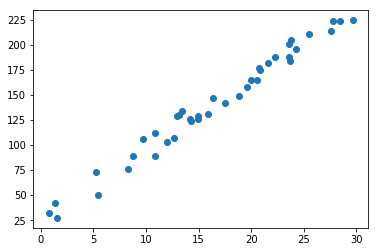

In [15]:
plt.scatter(x, y)

In [28]:
x_var = Variable(x.reshape(40, -1))
y_var = Variable(y.reshape(40, -1))

In [29]:
linear_function = L.Linear(None, 1)

In [30]:
def linear_forward(data):
    return linear_function(data)

In [31]:
optimizer = optimizers.MomentumSGD(lr=0.001)
optimizer.setup(linear_function)

In [32]:
def linear_train(train_data, train_target, n_epoch=200):
    
    for _ in range(n_epoch):
        
        output = linear_forward(train_data)
        
        loss = F.mean_squared_error(train_target, output)
        
        linear_function.cleargrads()
        
        loss.backward()
        
        optimizer.update()

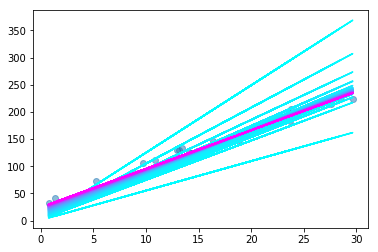

In [34]:
plt.scatter(x, y, alpha=0.5)
for i in range(150):
    linear_train(x_var, y_var, n_epoch=5)
    y_pred = linear_forward(x_var).data
    plt.plot(x, y_pred, color=plt.cm.cool(i/150.))

### Logistic Regression

In [35]:
x = 30*np.random.rand(40).astype(np.float32)
y = (7*x + 10) + 30*np.random.rand(40).astype(np.float32)
y_log = y > y.mean()

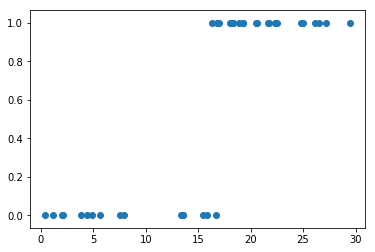

In [36]:
plt.scatter(x, y_log)

In [56]:
x_var = Variable(x.reshape(40, -1))
y_var = Variable(y_log.reshape(40, -1).astype(np.int32))

In [57]:
linear_function = L.Linear(None, 1)

In [64]:
class LinearModel(Chain):

    def __init__(self):
        super(LinearModel, self).__init__()
        
        with self.init_scope():
            self.W = L.Linear(1, 1)

    def __call__(self, x):
        return self.W(x)

In [76]:
linear_model = LinearModel()

In [79]:
linear_model(x_var)

variable([[-14.323567  ],
          [ -9.890892  ],
          [-12.402652  ],
          [-12.610758  ],
          [-11.486549  ],
          [-13.58486   ],
          [-14.007826  ],
          [ -3.656009  ],
          [ -5.9016137 ],
          [-16.590801  ],
          [-19.380434  ],
          [ -3.24081   ],
          [-13.547126  ],
          [ -1.5613928 ],
          [-12.459337  ],
          [ -1.4675584 ],
          [-13.570268  ],
          [-15.303219  ],
          [-15.257778  ],
          [-10.0963745 ],
          [-18.55445   ],
          [-10.035194  ],
          [-18.402128  ],
          [-16.737398  ],
          [-19.687466  ],
          [-11.7945    ],
          [-20.20232   ],
          [ -0.32550144],
          [-21.855566  ],
          [-13.46777   ],
          [ -2.8194618 ],
          [-13.370454  ],
          [-14.32328   ],
          [-12.106779  ],
          [-13.462297  ],
          [ -0.83603895],
          [-16.104933  ],
          [ -4.211498  ],
          [-

In [82]:
model = L.Classifier(linear_model, lossfun=F.sigmoid_cross_entropy)

In [83]:
model(x_var)

TypeError: __call__() missing 1 required positional argument: 'x'

In [58]:
def linear_forward(data):
    return linear_function(data)

In [59]:
optimizer = optimizers.MomentumSGD(lr=0.001)
optimizer.setup(linear_function)

In [62]:
def linear_train(train_data, train_target, n_epoch=200):
    
    for _ in range(n_epoch):
        
        output = linear_forward(train_data)
        
        loss = F.sigmoid_cross_entropy(output, train_target)
        
        dummy = loss + 1
        
        linear_function.cleargrads()
        
        dummy.backward()
        
        optimizer.update()

AttributeError: 'NoneType' object has no attribute 'dtype'

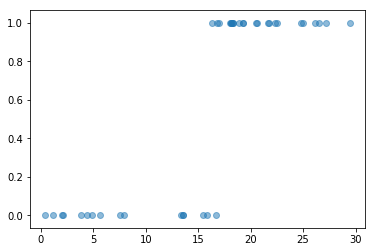

In [63]:
plt.scatter(x, y_log, alpha=0.5)
for i in range(150):
    linear_train(x_var, y_var, n_epoch=5)
    y_pred = linear_forward(x_var).data
    plt.plot(x, y_pred, color=plt.cm.cool(i/150.))